# **Regresión lineal**

**Su nombre**

**codigo**

In [1]:
#@title Libs
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

In [2]:
#@title Load dataset
url = "https://www.datos.gov.co/resource/fc78-ab9i.json"

try:
  response = requests.get(url)
  response.raise_for_status()

  data = response.json()
  df = pd.DataFrame(data)

except requests.exceptions.RequestException as e:
  print(f"Error connecting to API: {e}")
except Exception as e:
  print(f"Error processing data: {e}")


try:
  df.to_csv('data.csv', index=False)  # Save to a CSV file named 'data.csv' in the current directory (Archivos), no en drive
  print("DataFrame saved as data.csv")
except Exception as e:
  print(f"Error saving DataFrame as CSV: {e}")

df.head()

DataFrame saved as data.csv


,cod,deptos,cod_mun,municipio,a_o,tasa_natalidad,nacimientos,tasa_fecundidad_gral,mujer_15_a_49_a_os,mujer_10_a_49_a_os,...,tasa_incidencia_violencia_1,casos_violencia_60_a_os,tasa_incidencia_violencia_2,casos_violencia_5_a_os,tasa_incidencia_violencia_3,tasa_de_mortalidad_en_5_a,nacidos_con_bajo_peso_o_37,tasa_mortalida_perinatal,tasa_fecund_10_14_a_os,tasa_fecund_15_19_a_os
0,68.001,SANTANDER,68.001,Bucaramanga,2008,18.14,9.457,63.14,149.769,172.174,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,68.001,SANTANDER,68.001,Bucaramanga,2009,16.85,8.807,59,149.264,171.436,...,263.72,99,167.46,5,10.89,2.63,NaN,NaN,NaN,NaN
2,68.001,SANTANDER,68.001,Bucaramanga,2010,16.03,8.402,56.55,148.569,170.459,...,297.37,121,199.27,8,17.65,2.66,NaN,NaN,NaN,NaN
3,68.001,SANTANDER,68.001,Bucaramanga,2011,16.88,8.866,60.02,147.724,169.288,...,469.13,342,548.94,34,76.05,0,NaN,NaN,NaN,NaN
4,68.001,SANTANDER,68.001,Bucaramanga,2012,17.38,9.142,62.31,146.727,167.894,...,389.89,271,423.62,256,580.58,2.73,NaN,NaN,NaN,NaN


In [3]:
#@title Variables
#@markdown Relación entre las variables $x$ (Tasa de incidencia de tuberculosis) y $y$ (Casos nuevos de tuberculosis)
x = df['tasa_incidencia_tuberculosis'].astype(float)
print('x=',np.array(x))
y = df['casos_nuevos_tuberculosis'].astype(float)
print('\ny=',np.array(y))

x= [47.56 45.52 40.07 54.27 47.33 45.75 37.92 45.84 22.34 50.52 46.3  46.84
 40.33 16.27 47.56 45.52 40.07 54.27 47.33 45.75 37.92 45.84 22.34 50.52
 46.3  46.84 40.33 16.27]

y= [248. 238. 210. 285. 249. 241. 200. 242. 118. 267. 245. 279. 245. 100.
 248. 238. 210. 285. 249. 241. 200. 242. 118. 267. 245. 279. 245. 100.]


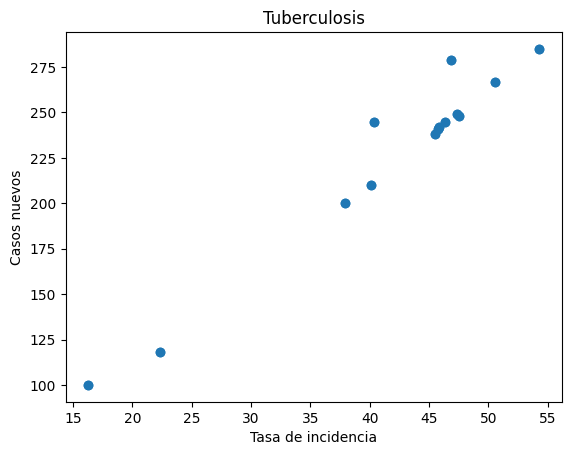

In [4]:
#@title Gráfica de dispersión
plt.plot(x, y, 'o')
plt.title('Tuberculosis')
plt.xlabel('Tasa de incidencia')
plt.ylabel('Casos nuevos')
plt.show()

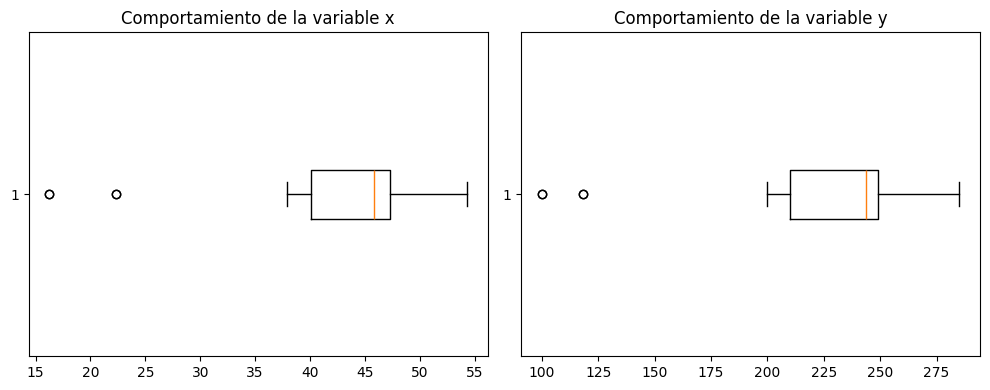

In [5]:
#@title Comportamiento de las variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Comportamiento de la variable y')

plt.tight_layout()
plt.show()

In [6]:
#@title Regresion Lineal Completa

def regresion(x, y, alpha, z):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  # print('sum_x2 es', sum_x2)
  x_barra = np.sum(x) / n
  # print('x_barra es', x_barra)
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)
  # print('SXY es', SXY)
  # print('SXX es', SXX)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica
  print("Mi recta de regresion es", B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)

  # Estimación sigma2
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)
  print('SSE es', SSE)
  sigma2 = SSE/(n-2)
  print('sigma2 es', sigma2)
  sigma = np.sqrt(sigma2)
  print('sigma es', sigma)

  #parámetros de B0, B1
  var_B1 = sigma2 / SXX
  print('var_B1 es', var_B1)
  var_B0 = (sigma2*sum(x**2)) / (n*SXX)
  print('var_B0 es', var_B0)
  std_B1 = np.sqrt(var_B1)
  print('std_B1 es', std_B1)
  std_B0 = np.sqrt(var_B0)
  print('std_B0 es', std_B0)
  cov_B1B0 = -(x_barra*sigma2)/(n*SXX)
  print('cov de B0 y B1 es', cov_B1B0)

  #intervalos de confianza
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  supB1 = B1 + t_medio*std_B1
  infB1 = B1 - t_medio*std_B1
  print('La cota superior para B1 es', supB1)
  print('La cota inferior para B1 es', infB1)
  y_estimadosSup = B0 + supB1*x
  y_estimadosInf = B0 + infB1*x

  #intervalo de predicción para Y
  y_estimado = B0 + B1*z
  supY = y_estimado + t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  infY = y_estimado - t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  print('La cota superior para Y es', supY)
  print('La cota inferior para Y es', infY)


  #Correlacion
  SYY = np.sum((y - y_barra)**2)
  print("SYY:", SYY)
  r = SXY/np.sqrt(SXX*SYY)
  print("r es",r)

  return B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY


In [7]:
try:
  x = np.array(x)
  y = np.array(y)

  B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY = regresion(x, y, 0.05, 45)

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

Mi recta de regresion es 13.673661488648719 + 5.07032126769403 x
B0 es 13.673661488648719 y B1 es 5.07032126769403
SSE es 3709.4030447434634
sigma2 es 142.66934787474858
sigma es 11.944427482083375
var_B1 es 0.04963462553641342
var_B0 es 92.31164156818963
std_B1 es 0.22278829757510474
std_B0 es 9.607894752139494
cov de B0 y B1 es -0.0743075927099479
La cota superior para B1 es 5.528269171944786
La cota inferior para B1 es 4.612373363443274
La cota superior para Y es 266.8646408629298
La cota inferior para Y es 216.8115962068304
SYY: 77604.71428571428
r es 0.9758080334751164


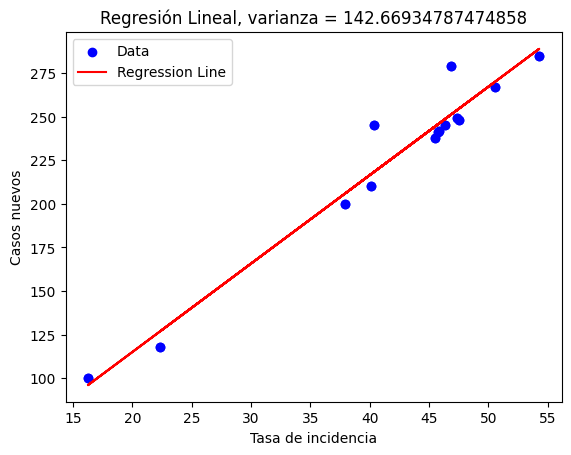

In [8]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_estimados, color='red', label='Regression Line')
plt.xlabel('Tasa de incidencia')
plt.ylabel('Casos nuevos')
plt.title(f'Regresión Lineal, varianza = {sigma2}')
plt.legend()
plt.show()

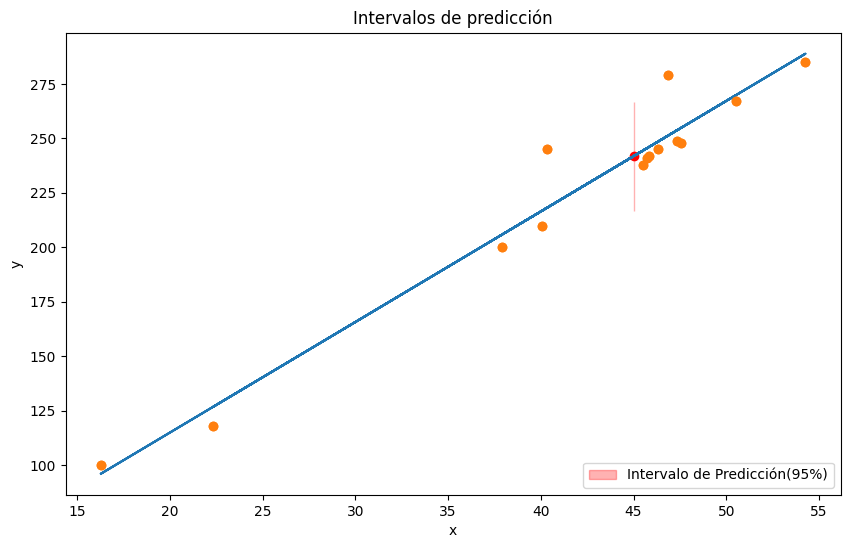

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_estimados)
plt.plot(x, y, 'o')
plt.scatter(45, y_estimado, color='red')
plt.fill_between(np.array([45]), infY, supY, color='red', alpha=0.3, label='Intervalo de Predicción(95%)')
plt.legend(loc='lower right')
plt.title('Intervalos de predicción')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
#@title Simulación
def simulate_regression_lines(x, y, sigma, num_simulations=3,):
    n = len(x)
    slopes = []
    intercepts = []

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Datos Reales", color="blue")

    # Modelo base sin ruido (regresión real)
    model_real = LinearRegression()
    model_real.fit(x.reshape(-1, 1), y)
    y_real = model_real.predict(x.reshape(-1, 1))
    plt.plot(x, y_real, color="black", label="Real", linewidth=2)

    for i in range(num_simulations):
        # Generar errores aleatorios con distribución N(0, sigma)
        errors = np.random.normal(loc=0, scale=sigma, size=n)
        y_simulated = y + errors

        # Ajustar la regresión lineal con los datos perturbados
        model_sim = LinearRegression()
        model_sim.fit(x.reshape(-1, 1), y_simulated)

        slopes.append(model_sim.coef_[0])
        intercepts.append(model_sim.intercept_)

        # Dibujar la línea simulada
        y_simulated_line = intercepts[i] + slopes[i] * x
        plt.plot(x, y_simulated_line, alpha=0.8, label=f"Simulada {i+1}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Familia de rectas con error modelado")
    plt.legend()
    plt.show()

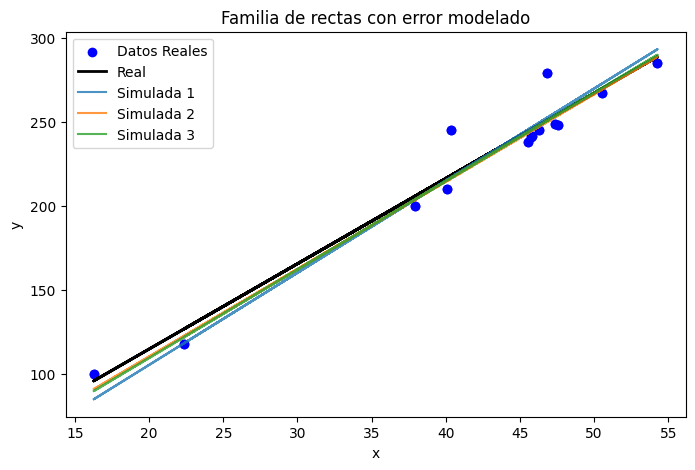

In [11]:
simulate_regression_lines(x, y, sigma, num_simulations=3)

In [12]:
#@title Prueba de hipótesis sobre $\beta1$
def pruebaHipotesis(x,B0,B1,std_B1,alpha):
  n = np.size(x)
  T = (B1 - 0)/(std_B1)
  print('T es', T)

  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  print('el valor crítico es', t_medio)

  if abs(T)>t_medio:
    print('Se rechaza H0 bajo', alpha)
  else:
    print('No se rechaza H0 bajo', alpha)

In [13]:
pruebaHipotesis(x,B0,B1,std_B1,0.05)

T es 22.758472158910237
el valor crítico es 2.055529438642871
Se rechaza H0 bajo 0.05


In [14]:
#@title Ejercicio de clase (borrable)

y_column = [190,160,134,129,172,197,167,239,542,372,245,376,454,410]
x_column = [7.23,8.53,9.82,10.26,8.96,12.27,10.28,4.45,1.78,4.0,3.3,4.3,0.8,0.5]

In [15]:
#Intervalo de predicción
def intervaloPredicción(B0,B1,Xpred,x_barra,alpha,sigma,SXX,n):
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  y = B0 + B1*Xpred
  print(y)
  Intervalo_sup = y + t_medio*sigma*(np.sqrt(1 + 1/n + (Xpred - x_barra)**2/SXX))
  Intervalo_inf = y - t_medio*sigma*(np.sqrt(1 + 1/n + (Xpred - x_barra)**2/SXX))
  print('El intervalo de predicción con una significancia de', alpha, 'para X =',Xpred, 'es', Intervalo_inf, 'y', Intervalo_sup)

intervaloPredicción(-0.3633,0.2838,45,54.218,0.05,0.581,1660.576,14)


12.407699999999998
El intervalo de predicción con una significancia de 0.05 para X = 45 es 11.066454489024135 y 13.748945510975862
